### Module Import

In [1]:
import os
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from PIL import Image

### Load Image

In [2]:
file = "./lena_raw_512x512.raw"
file_ID = open(file, "rb")
img_Lena = np.fromfile(file_ID, dtype = 'uint8', sep = "")
img_Lena = np.reshape(img_Lena, [512, 512])

file = "./BOAT512.raw"
file_ID = open(file, "rb")
img_Boat = np.fromfile(file_ID, dtype = 'uint8', sep = "")
img_Boat = np.reshape(img_Boat, [512, 512])

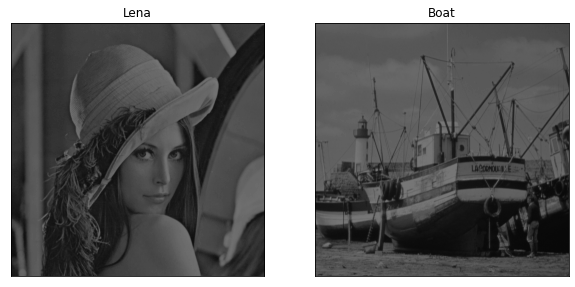

In [3]:
fig = plt.figure(figsize = (10,10))

plt.subplot(1,2,1)
plt.imshow(img_Lena, cmap='gray', vmin=0, vmax=500)
plt.title('Lena')
plt.xticks([])
plt.yticks([])

plt.subplot(1,2,2)
plt.imshow(img_Boat, cmap='gray', vmin=0, vmax=500)
plt.title('Boat')
plt.xticks([])
plt.yticks([])

plt.show()

### DCT

In [9]:
def nint(x):
    if x<0:
        result = int(x-0.5)
    else:  
        result = int(x+0.5)
    return result

#### 8x8 Forward DCT_bug

In [121]:
def forwardDCT(block):
    B_size = 8
    ix = np.array(block)

    pi = 3.141592653589793238

    x = np.empty(shape=(B_size, B_size), dtype = 'float')
    z = np.empty(shape=(B_size, B_size), dtype = 'float')
    y = np.empty(shape=B_size, dtype = 'float')

    c = np.empty(shape=40, dtype = 'float')
    s = np.empty(shape=40, dtype = 'float')
    ft = np.empty(shape=4, dtype = 'float')
    fxy = np.empty(shape=4, dtype = 'float')
    yy = np.empty(shape=B_size, dtype = 'float')

    zz = 0.0

    for i in range(40):
        zz = pi + (i+1)/64
        c[i] = math.cos(zz)
        s[i] = math.sin(zz)
    
    # 여기 아직 해결안됨
    for i in range(B_size):
        for j in range(B_size):
            x[i][j] = ix[i][j]

    for i in range (B_size):
        for j in range(B_size):
            y[j] = x[i][j]

        for j in range(4):
            ft[j] = y[j] + y[7-j]

        fxy[0] = ft[0] + ft[3]
        fxy[1] = ft[1] + ft[2]
        fxy[2] = ft[1] - ft[2]
        fxy[3] = ft[0] - ft[3]

        ft[0] = c[15] * (fxy[0] + fxy[1])
        ft[2] = c[15] * (fxy[0] - fxy[1])
        ft[1] = s[7] * fxy[2] + c[7] * fxy[3]
        ft[3] = -s[23] * fxy[2] + c[23] * fxy[3]

        for j in range(4, 8):
            y[j] = y[7-j] - y[j]

        y[4] = yy[4]
        y[7] = yy[7]
        y[5] = c[15] * (-yy[5] + yy[6])
        y[6] = c[15] * (yy[5] + yy[6])

        yy[4] = y[4] + y[5]
        yy[5] = y[4] - y[5]
        yy[6] = -y[6] + y[7]
        yy[7] = y[6] + y[7]

        y[0] = ft[0]
        y[4] = ft[2]
        y[2] = ft[1]
        y[6] = ft[3]
        y[1] = s[3] * yy[4] + c[3] * yy[7]
        y[5] = s[19] * yy[5] + c[19] * yy[6]
        y[3] = -s[11] * yy[5] + c[11] * yy[6]
        y[7] = -s[27] * yy[4] + c[27] * yy[7]

        for j in range(B_size):
            z[i][j] = y[j]
    
    for i in range(B_size):
        for j in range(B_size):
            y[j] = z[j][i]

        for j in range(4):
            ft[j] = y[j] + y[7-j]

        fxy[0] = ft[0] + ft[3]
        fxy[1] = ft[1] + ft[2]
        fxy[2] = ft[1] - ft[2]
        fxy[3] = ft[0] - ft[3]

        ft[0] = c[15] * (fxy[0] + fxy[1])
        ft[2] = c[15] * (fxy[0] - fxy[1])
        ft[1] = s[7] * fxy[2] + c[7] * fxy[3]
        ft[3] = -s[23] * fxy[2] + c[23] * fxy[3]

        for j in range(4, 8):
            yy[j] = y[7-j] - y[j]

        y[4] = yy[4]
        y[7] = yy[7]
        y[5] = c[15] * (-yy[5] + yy[6])
        y[6] = c[15] * (yy[5] + yy[6])

        yy[4] = y[4] + y[5]
        yy[5] = y[4] - y[5]
        yy[6] = -y[6] + y[7]
        yy[7] = y[6] + y[7]

        y[0] = ft[0]
        y[4] = ft[2]
        y[2] = ft[1]
        y[6] = ft[3]
        y[1] = s[3] * yy[4] + c[3] * yy[7]
        y[5] = s[19] * yy[5] + c[19] * yy[6]
        y[3] = -s[11] * yy[5] + c[11] * yy[6]
        y[7] = -s[27] * yy[4] + c[27] * yy[7]

        for j in range(B_size):
            y[j] = y[j] / 4.0

        for j in range(B_size):
            z[j][i] = y[j]
	
    for i in range(B_size):
        for j in range(B_size):
            ix[i][j] = nint(z[i][j])

    return ix

#### 8x8 Forward DCT_Fix

In [17]:
def forwardDCT_fix(img_block):
    block_Size = 8
    ix = np.array(img_block)
    
    pi = 3.141592653589793238

    x = np.zeros(shape=(block_Size, block_Size), dtype = 'float')
    z = np.zeros(shape=(block_Size, block_Size), dtype = 'float')
    y = np.zeros(shape=block_Size, dtype = 'float')

    c = np.zeros(shape=40, dtype = 'float')
    s = np.zeros(shape=40, dtype = 'float')

    ft = np.zeros(shape=4, dtype = 'float')
    fxy = np.zeros(shape=4, dtype = 'float')
    yy = np.zeros(shape=block_Size, dtype = 'float')
    
    for i in range(0, 40):
        zz = (pi * float(i+1)) / 64.0
        c[i] = math.cos(zz)
        s[i] = math.sin(zz)

    for ii in range(0, block_Size):
        for jj in range(0, block_Size):
            x[ii, jj] = float(ix[ii, jj])

    for ii in range(0, block_Size):
        for jj in range(0, block_Size):
            y[jj] = x[ii, jj]
        
        for jj in range(0, 4):
            ft[jj] = y[jj] + y[7-jj]

        fxy[0] = ft[0] + ft[3]
        fxy[1] = ft[1] + ft[2]
        fxy[2] = ft[1] - ft[2]
        fxy[3] = ft[0] - ft[3]

        ft[0] = c[15] * (fxy[0] + fxy[1])
        ft[2] = c[15] * (fxy[0] - fxy[1])
        ft[1] = s[7] * fxy[2] + c[7] * fxy[3]
        ft[3] = -s[23] * fxy[2] + c[23] * fxy[3]

        for jj in range(4, 8):
            yy[jj] = y[7-jj] - y[jj]
        
        y[4] = yy[4]
        y[7] = yy[7]
        y[5] = c[15] * (-yy[5] + yy[6])
        y[6] = c[15] * (yy[5] + yy[6])

        yy[4] = y[4] + y[5]
        yy[5] = y[4] - y[5]
        yy[6] = -y[6] + y[7]
        yy[7] = y[6] + y[7]

        y[0] = ft[0]
        y[4] = ft[2]
        y[2] = ft[1]
        y[6] = ft[3]
        y[1] = (s[3] * yy[4]) + (c[3] * yy[7])
        y[5] = (s[19] * yy[5]) + (c[19] * yy[6])
        y[3] = (-s[11] * yy[5]) + (c[11] * yy[6])
        y[7] = (-s[27] * yy[4]) + (c[27] * yy[7])

        for jj in range(0, block_Size):
            z[ii, jj] = y[jj]
    
    for ii in range(0, block_Size):
        for jj in range(0, block_Size):
            y[jj] = z[jj, ii]
            
        for jj in range(0, 4):
            ft[jj] = y[jj] + y[7-jj]

        fxy[0] = ft[0] + ft[3]
        fxy[1] = ft[1] + ft[2]
        fxy[2] = ft[1] - ft[2]
        fxy[3] = ft[0] - ft[3]

        ft[0] = c[15] * (fxy[0] + fxy[1])
        ft[2] = c[15] * (fxy[0] - fxy[1])
        ft[1] = (s[7] * fxy[2]) + (c[7] * fxy[3])
        ft[3] = (-s[23] * fxy[2]) + (c[23] * fxy[3])

        for jj in range(4, 8):
            yy[jj] = y[7-jj] - y[jj]

        y[4] = yy[4]
        y[7] = yy[7]
        y[5] = c[15] * (-yy[5] + yy[6])
        y[6] = c[15] * (yy[5] + yy[6])

        yy[4] = y[4] + y[5]
        yy[5] = y[4] - y[5]
        yy[6] = -y[6] + y[7]
        yy[7] = y[6] + y[7]

        y[0] = ft[0]
        y[4] = ft[2]
        y[2] = ft[1]
        y[6] = ft[3]
        y[1] = (s[3] * yy[4]) + (c[3] * yy[7])
        y[5] = (s[19] * yy[5]) + (c[19] * yy[6])
        y[3] = (-s[11] * yy[5]) + (c[11] * yy[6])
        y[7] = (-s[27] * yy[4]) + (c[27] * yy[7])
        
        for jj in range(0, block_Size):
            y[jj] = y[jj] / 4.0

        for jj in range(0, block_Size):
            z[jj, ii] = y[jj]
    
    for ii in range(0, block_Size):
        for jj in range(0, block_Size):
            ix[ii, jj] = round(z[ii, jj])
    
    return ix

#### Test

In [18]:
testblock = img_Lena[0:8, 0:8]
testDCT = forwardDCT_fix(testblock)
print(testDCT)

[[  1   6   3   0   0   0 250   7]
 [  8   0   0 251   2   3 252   3]
 [251 255 255   1 255 255   2 254]
 [  2   2   1   2 255 254   0   0]
 [255 254   0 254   2   1 255   0]
 [  1   1 254   0 254   1   1   1]
 [254   0   3   2   2 253 255 255]
 [  2   0 254 254 255   2   0   1]]


In [19]:
result_2 = np.empty(shape = (512, 512), dtype = 'uint8')

for i in range(0, 512, 8):
    for j in range(0, 512, 8):
        block = img_Lena[i:i+8, j:j+8]
        block_DCT = forwardDCT_fix(block)
        result_2[i:i+8, j:j+8] = block_DCT

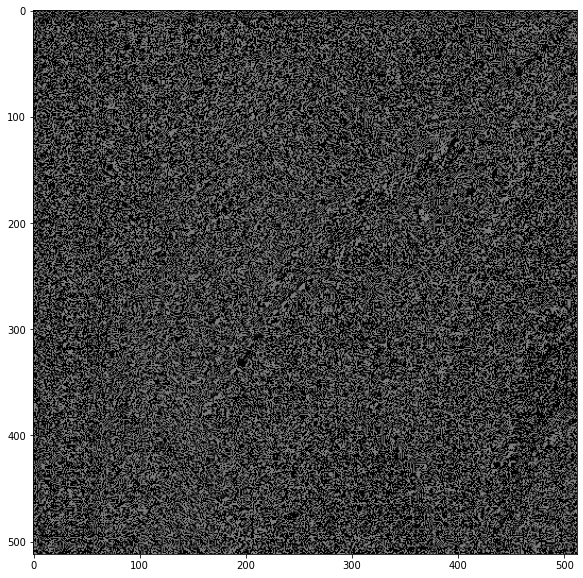

In [20]:
plt.figure(figsize = (10,10))
plt.imshow(result_2, cmap='gray', vmin=0, vmax=500)

#### Save

In [ ]:
save_result = Image.fromarray(result)

dir_path = "./Result"
if not os.path.exists(dir_path):
    os.makedirs(dir_path)
save_result.save("./Result/result_DCT3.bmp", 'BMP')

#### 8x8 Inverse DCT